The dataset, named "Churn_Modelling.csv," contains information about 10,000 customers, with 14 columns capturing details relevant to customer churn prediction. Here’s a breakdown of each column:

* RowNumber: Sequential identifier for each row in the dataset.
* CustomerId: Unique identifier for each customer.
* Surname: Last name of the customer.
* CreditScore: Customer's credit score, indicating their creditworthiness.
* Geography: Country where the customer is located (e.g., France, Spain).
* Gender: Gender of the customer (Male or Female).
* Age: Age of the customer.
* Tenure: Number of years the customer has been with the bank.
* Balance: Account balance of the customer.
* NumOfProducts: Number of products the customer has purchased from the bank.
* HasCrCard: Indicates whether the customer has a credit card (1 for yes, 0 for no).
* IsActiveMember: Indicates if the customer is an active member (1 for yes, 0 for no).
* EstimatedSalary: Estimated annual salary of the customer.
* Exited: Target variable indicating whether the customer has churned (1 for yes, 0 for no).

* This dataset is suitable for building a predictive model to assess the likelihood of customer churn based on various demographic, financial, and engagement attributes. ​

# Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Basic understand of data

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


# Data Cleaning

In [ ]:
# To count the null values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Find all duplicated rows
duplicates = df[df.duplicated()]

# Count the number of duplicated rows
duplicate_count = duplicates.shape[0]

print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


# Data Visualization

In [ ]:
# How many unique values are present in each column.
for x in df.columns:
  print("nunique",x)
  print(df[x].nunique())
  print(" ")

nunique RowNumber
10000
 
nunique CustomerId
10000
 
nunique Surname
2932
 
nunique CreditScore
460
 
nunique Geography
3
 
nunique Gender
2
 
nunique Age
70
 
nunique Tenure
11
 
nunique Balance
6382
 
nunique NumOfProducts
4
 
nunique HasCrCard
2
 
nunique IsActiveMember
2
 
nunique EstimatedSalary
9999
 
nunique Exited
2
 


# Countplot

A countplot is a type of visualization that displays the count of observations in each category of a categorical variable

<ipython-input-12-5b23e7d3e3cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Exited",data=df,palette="viridis")


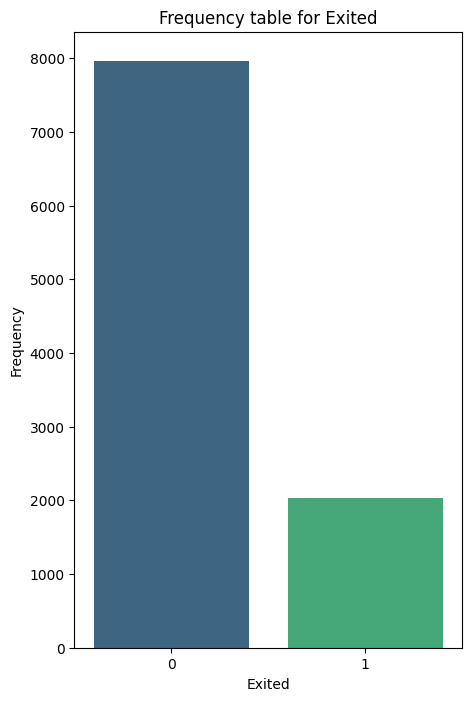

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,8))
sns.countplot(x="Exited",data=df,palette="viridis")
plt.title("Frequency table for Exited")
plt.xlabel("Exited")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

<ipython-input-14-1e88694fcff8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Geography",data=df,palette="viridis")


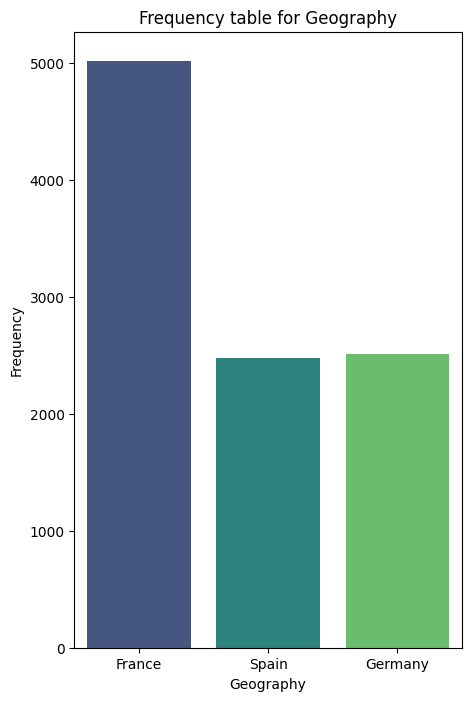

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,8))
sns.countplot(x="Geography",data=df,palette="viridis")
plt.title("Frequency table for Geography")
plt.xlabel("Geography")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

<ipython-input-15-cf6f173e11f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender",data=df,palette="viridis")


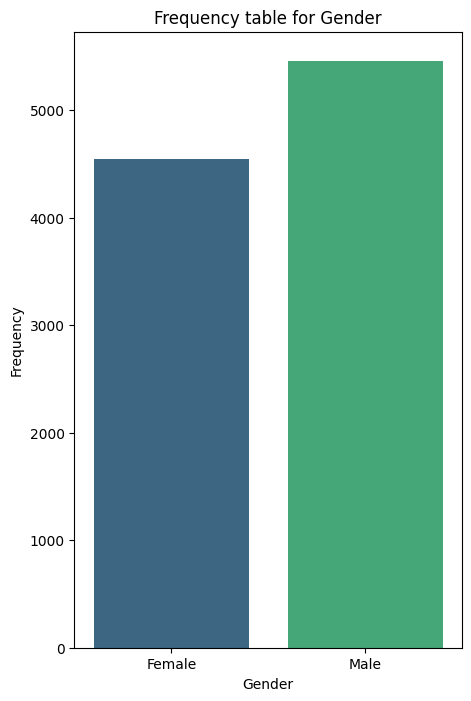

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,8))
sns.countplot(x="Gender",data=df,palette="viridis")
plt.title("Frequency table for Gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# Histogram

A histogram is a graphical representation of the distribution of numerical data.

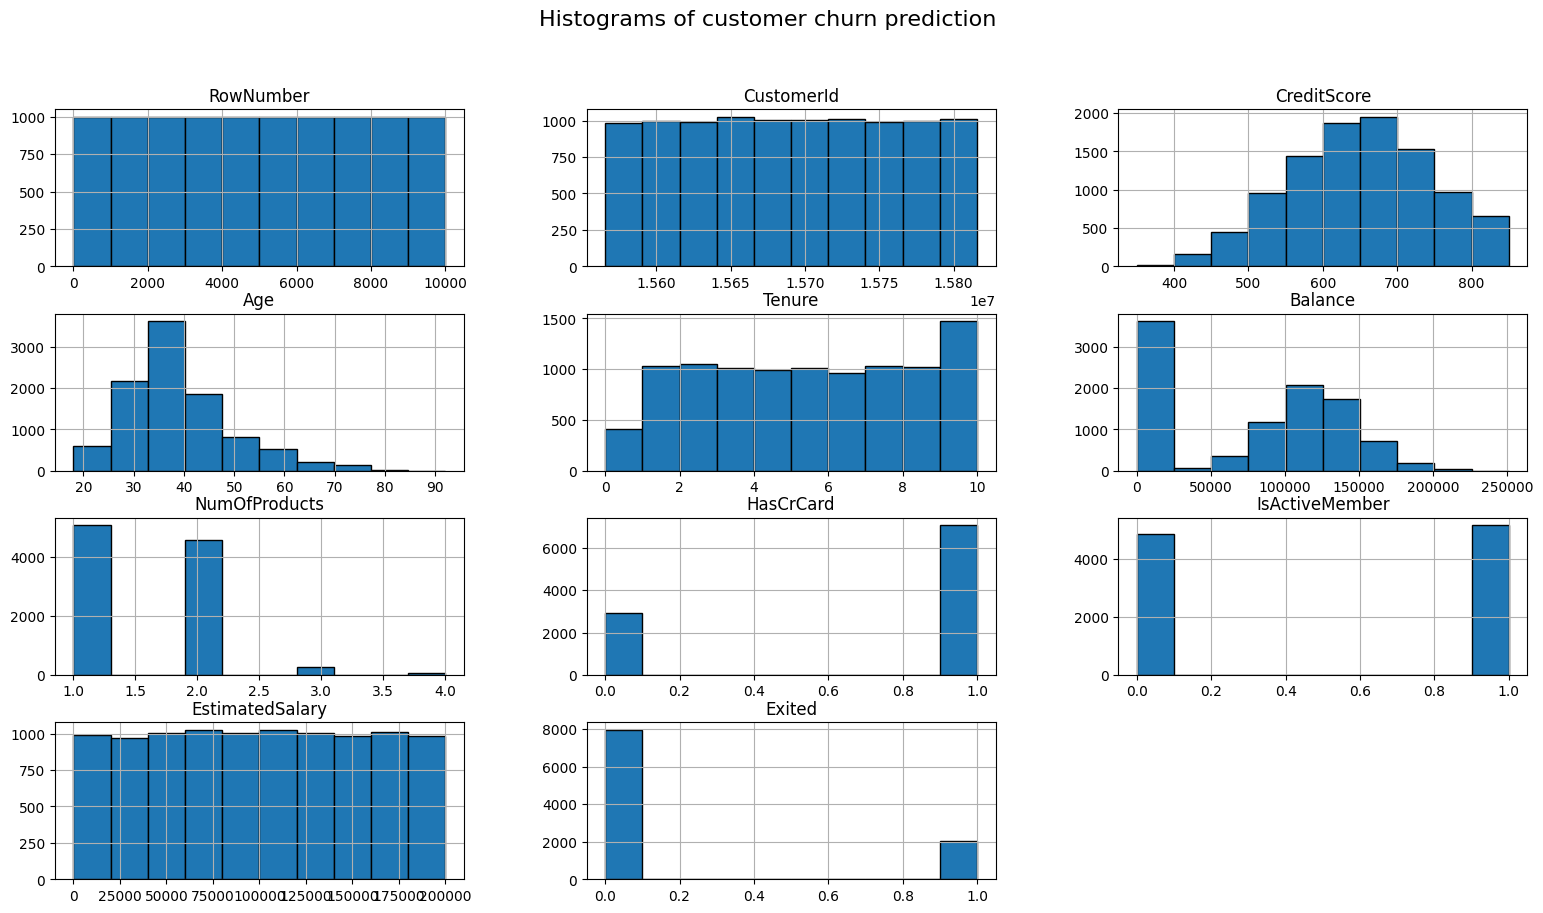

In [ ]:
# Histogram
df.hist(edgecolor='black',figsize=(19,10))
plt.suptitle('Histograms of customer churn prediction',fontsize=16)
plt.show()

# Correlation analysis

In [ ]:
# Converting all the strings to numerical values using labelencoder class
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Surname'] = labelencoder.fit_transform(df['Surname'])
df['Geography'] = labelencoder.fit_transform(df['Geography'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


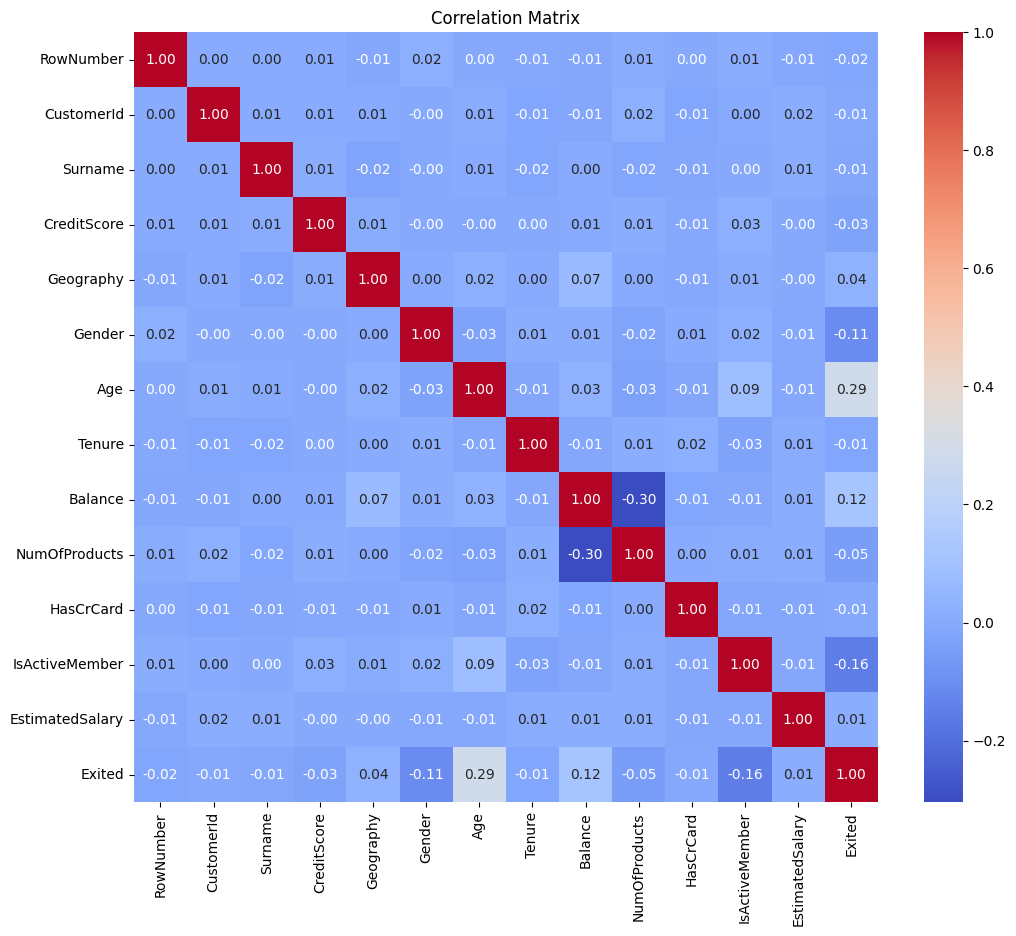

In [ ]:
# Correlation matrix heatmap
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.001682,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005689,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Surname,0.001682,0.005689,1.000000,0.007489,-0.022878,-0.002049,0.005550,-0.017412,0.002657,-0.016460,-0.008993,0.001483,0.011850,-0.010822
CreditScore,0.005840,0.005308,0.007489,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,-0.022878,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002049,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,0.005550,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,-0.017412,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.002657,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,-0.016460,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820


# Outliers

Outlier Detection is the process of identifying data points that significantly differ from the majority of a dataset.

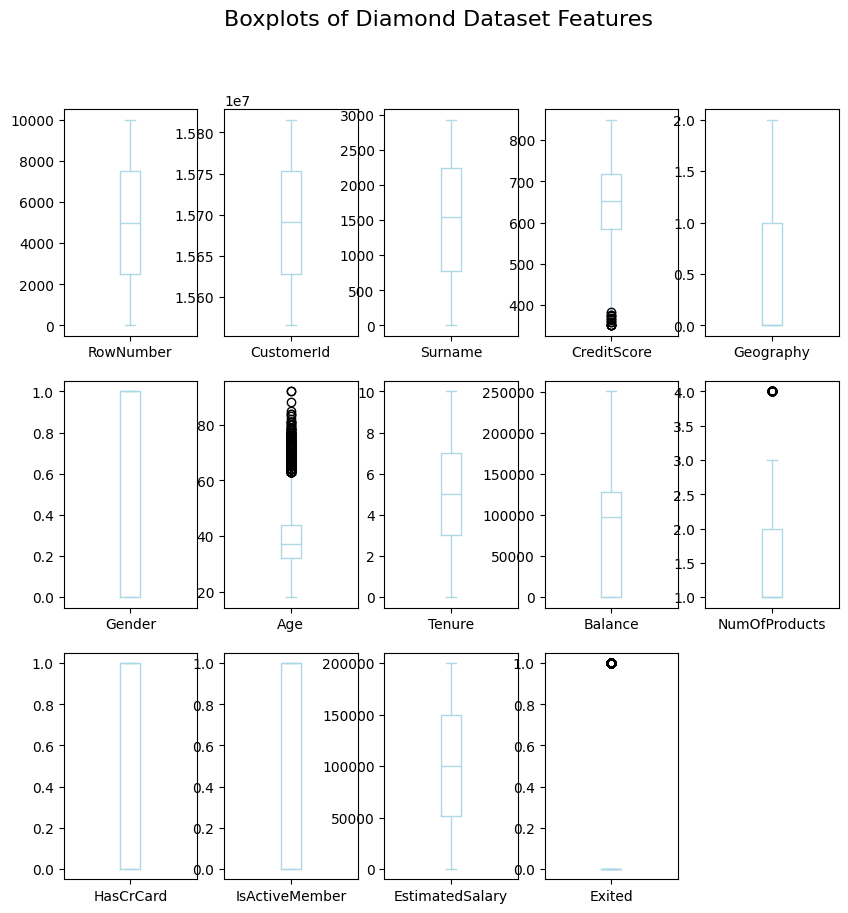

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(10,10),
color='lightblue')
plt.suptitle('Boxplots of Diamond Dataset Features', fontsize=16)
plt.show()

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-22-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df['CreditScore'].fillna(df['CreditScore'].mode(), inplace=True)

<ipython-input-23-e06aa74e1649>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CreditScore'].fillna(df['CreditScore'].mode(), inplace=True)


In [ ]:
df['NumOfProducts'].fillna(df['NumOfProducts'].median(), inplace=True)

<ipython-input-24-43ebf56c63c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumOfProducts'].fillna(df['NumOfProducts'].median(), inplace=True)


In [ ]:
df['Exited'].fillna(df['Exited'].median(), inplace=True)

<ipython-input-25-906d27c75811>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Exited'].fillna(df['Exited'].median(), inplace=True)


# Feature engineering

In [ ]:
df.skew()

,0
RowNumber,0.000000
CustomerId,0.001149
Surname,-0.022050
CreditScore,-0.071607
Geography,0.500916
Gender,-0.183596
Age,1.011320
Tenure,0.010991
Balance,-0.141109
NumOfProducts,0.745568


# Dimensionality Reduction
# principle component analysis(PCA)

Dimensionality Reduction is the process of reducing the number of features or variables in a dataset while retaining as much information as possible.

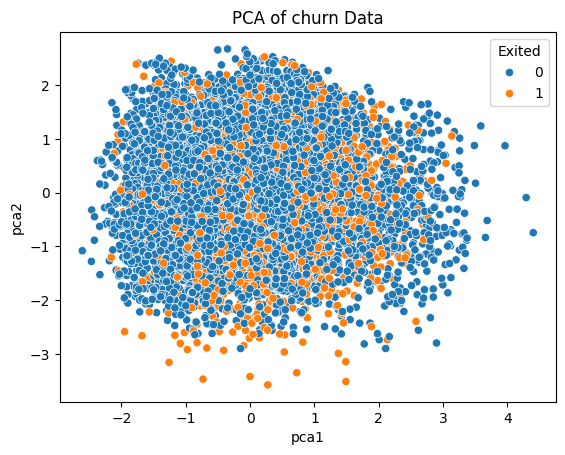

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ['Age', 'IsActiveMember','CreditScore','Tenure']
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]


# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='Exited', data=df)
plt.title('PCA of churn Data')
plt.show()


# Data Scaling

Data Scaling is the process of transforming the features in a dataset to a similar scale or range. This is essential in many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Standardization (mean = 0, std = 1)
scaler = StandardScaler()
df[['Age', 'IsActiveMember','CreditScore','Tenure']] = scaler.fit_transform(df[['Age', 'IsActiveMember','CreditScore','Tenure']])

#Normalization (scaling to 0-1 range)
minmax_scaler = MinMaxScaler()
df[['Age', 'IsActiveMember','CreditScore','Tenure']] = minmax_scaler.fit_transform(df[['Age', 'IsActiveMember','CreditScore','Tenure']])

# Initial Modeling and Hypothesis testing

Initial Modeling and Hypothesis Testing are foundational steps in the data analysis and machine learning process, aimed at understanding the data and establishing relationships among variables.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Age', 'IsActiveMember','CreditScore','Tenure']]
y = df['Exited']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 0.29
R-squared: 0.12
Mean Squared Error: 0.14


# Documentation and Reporting

In [ ]:
# Summarize key findings
summary = {
    'Dataset Shape': df.shape,
    'Missing Values': df.isnull().sum().sum(),
    'Correlation with Exited': df.corr()['Exited'].sort_values(ascending=False)
}

print("EDA Summary:")
for key, value in summary.items():
    print(f"{key}: {value}")

# Prepare final dataset for modeling
final_df = df[['Age', 'IsActiveMember','CreditScore','Tenure']]


EDA Summary:
Dataset Shape: (10000, 16)
Missing Values: 0
Correlation with Exited: Exited             1.000000
Age                0.285323
Balance            0.118533
pca1               0.071087
Geography          0.035943
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Surname           -0.010822
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
pca2              -0.094566
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64
